# Descriptive Analyses

Intro tables to give context to the data
1. Distribution of affirmation rates for both rumours

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("talk")
participants = pd.read_csv("../data/processed/mock_data/participant-schema.csv",index_col=0)
posts = pd.read_csv("../data/processed/mock_data/posts-schema.csv",index_col=0)
posts

,PROLIFIC_ID,STUDY_ID,SESSION_ID,treatment,secondsTaken,rumour,rumourId,evidence,code,mockGender,timestamp,warning,reshared
id,,,,,,,,,,,,,
1,1,1,1,True,93.87,R1,R1-1,high,questions,Female,57,False,True
1,1,1,1,True,93.87,R2,R2-1,low,questions,Female,9,False,True
1,1,1,1,True,93.87,R1,R1-2,high,affirms,Male,48,False,True
1,1,1,1,True,93.87,R2,R2-2,low,affirms,Female,21,True,False
1,1,1,1,True,93.87,R1,R1-3,high,affirms,Male,23,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,499,1,499,False,93.32,R2,R2-8,low,neutral,Male,43,False,True
499,499,1,499,False,93.32,R1,R1-9,high,questions,Male,1,False,True
499,499,1,499,False,93.32,R2,R2-9,low,affirms,Female,2,False,False


## Initial Tables

1. Participant statistics
2. Experiment descriptive statistics

### Participant statistics

In [2]:
from tableone import TableOne
table_one = TableOne(participants.reset_index().drop(["id",
                                                      "PROLIFIC_ID",
                                                      "STUDY_ID",
                                                      "SESSION_ID"],
                                                     axis=1))
table_one

Missing      Overall
n                                                                       440
age, mean (SD)                                              12  83.9 (38.3)
educationLevel, n (%)                 communityCollege      72    44 (12.0)
                                      doctorate                   63 (17.1)
                                      graduateSchool              59 (16.0)
                                      highSchool                  53 (14.4)
                                      none                        49 (13.3)
                                      secondary                   55 (14.9)
                                      undergrad                   45 (12.2)
politicalAffiliation, n (%)           centre                35    66 (16.3)
                                      centreLeft                  65 (16.0)
                                      centreRight                 75 (18.5)
                                      left                        72 (17.8)
                                      none                        62 (15.3)
                                      right                       65 (16.0)
attendsProtests, n (%)                0.0                    9   206 (47.8)
                                      1.0                        225 (52.2)
gender_female, n (%)                  0                      0   317 (72.0)
                                      1                          123 (28.0)
gender_intersex, n (%)                0                      0   304 (69.1)
                                      1                          136 (30.9)
gender_male, n (%)                    0                      0   289 (65.7)
                                      1                          151 (34.3)
gender_nonBinary, n (%)               0                      0   321 (73.0)
                                      1                          119 (27.0)
gender_transgender, n (%)             0                      0   318 (72.3)
                                      1                          122 (27.7)
affiliatedMovements_climate, n (%)    0                      0   342 (77.7)
                                      1                           98 (22.3)
affiliatedMovements_gender, n (%)     0                      0   359 (81.6)
                                      1                           81 (18.4)
affiliatedMovements_indigenous, n (%) 0                      0   345 (78.4)
                                      1                           95 (21.6)
affiliatedMovements_labour, n (%)     0                      0   348 (79.1)
                                      1                           92 (20.9)
affiliatedMovements_none, n (%)       0                      0   333 (75.7)
                                      1                          107 (24.3)
affiliatedMovements_race, n (%)       0                      0   343 (78.0)
                                      1                           97 (22.0)
affiliatedMovements_religion, n (%)   0                      0   354 (80.5)
                                      1                           86 (19.5)
socialMedias_facebook, n (%)          0                      0   352 (80.0)
                                      1                           88 (20.0)
socialMedias_instagram, n (%)         0                      0   345 (78.4)
                                      1                           95 (21.6)
socialMedias_none, n (%)              0                      0   345 (78.4)
                                      1                           95 (21.6)
socialMedias_reddit, n (%)            0                      0   337 (76.6)
                                      1                          103 (23.4)
socialMedias_snapchat, n (%)          0                      0   350 (79.5)
                                      1                           90 (20.5)
socialMedias_tiktok, n (%)            0                      0   360 (81.8)
                           

### Experiment descriptive statistics

In [3]:
table_two = TableOne(posts.reset_index().drop(["id","PROLIFIC_ID","STUDY_ID","SESSION_ID","rumour","evidence","code","rumourId"],
                                              axis=1),
                     groupby="treatment",
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by treatment                                                
                                            Missing      Overall         False         True P-Value
n                                                           8800          4300         4500        
secondsTaken, mean (SD)                           0  90.1 (14.6)   89.1 (14.4)  91.0 (14.8)  <0.001
mockGender, n (%)       Female                    0  4377 (49.7)   2119 (49.3)  2258 (50.2)   0.411
                        Male                         4423 (50.3)   2181 (50.7)  2242 (49.8)        
timestamp, mean (SD)                              0  29.8 (17.1)   29.6 (17.1)  30.0 (17.1)   0.252
warning, n (%)          False                     0  8398 (95.4)  4300 (100.0)  4098 (91.1)  <0.001
                        True                           402 (4.6)                  402 (8.9)        
reshared, n (%)         False                     0  4328 (49.2)   2159 (50.2)  2169 (48.2)   0.062
                        True                         4472 (50.8)   2141 (49.8)  2331 (51.8)

## Sample Visualizations

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


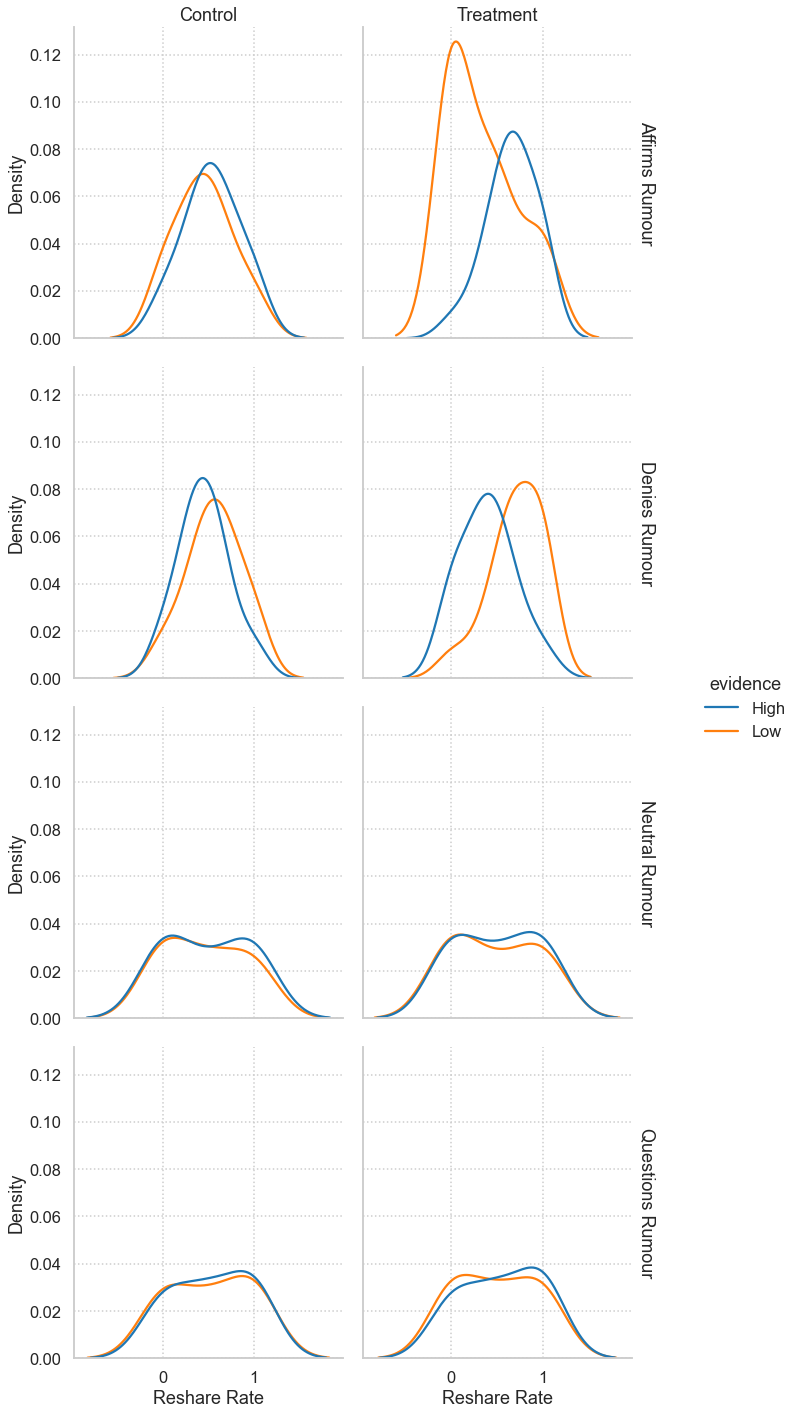

In [4]:
group_cols = ["PROLIFIC_ID","SESSION_ID","treatment","warning","evidence","code"]
affirmation_rates = pd.DataFrame(posts.groupby(group_cols)["reshared"].sum() / posts.groupby(group_cols)["reshared"].count()).reset_index()
# Nicely format labels
affirmation_rates['treatment'] = affirmation_rates['treatment'].replace({False: 'Control',
                                                                          True: 'Treatment'})
sorting_dict = {'Control': 0, 
                'Treatment': 1, 
                'Affirms': 0,
                'Denies': 1,
                'Neutral': 2,
                'Questions': 3}
affirmation_rates['code'] = affirmation_rates['code'].str.title()
affirmation_rates["evidence"] = affirmation_rates["evidence"].str.title()
affirmation_rates = affirmation_rates.sort_values(by=['treatment','code'],key=lambda x: x.map(sorting_dict))
g = sns.displot(data=affirmation_rates, 
            x="reshared",
            hue="evidence",
            col="treatment",
            row="code",
            bw_adjust=1.8,
            facet_kws={"margin_titles":True},
            kind="kde")
g.set_titles(col_template="{col_name}", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Reshare Rate")
g.save_fig("figures/descriptive_analysis")